# 자연언어처리(NLP : Natural Language Processing)

 - nltk
 - konlpy
 

In [10]:
# pip install konlpy
from konlpy.tag import Kkma
from konlpy.tag import Twitter

In [4]:
Kkma = Kkma()


C:\Users\CPB06GameN\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [5]:
Kkma.sentences('한국어 분석을 시작합니다 재미있어요~')

['한국어 분석을 시작합니다', '재미있어요~']

In [6]:
Kkma.nouns('한국어 분석을 시작합니다 재미있어요~')

['한국어', '분석']

In [8]:
Kkma.pos('한국어 분석을 시작합니다 재미있어요~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~', 'SO')]

In [11]:
t = Twitter()

C:\Users\CPB06GameN\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [12]:
# 형태소
t.morphs('한국어 분석을 시작합니다 재미있어요~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~']

In [13]:
# 형태소
t.pos('한국어 분석을 시작합니다 재미있어요~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~', 'Punctuation')]

In [14]:
t.nouns('한국어 분석을 시작합니다 재미있어요~')

['한국어', '분석', '시작']

### 워드클라우드

In [23]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [81]:
text = open('C:/Users/CPB06GameN/Desktop/영어 성경/40-Matthew (마태복음).txt').read()
alice_mask = np.array(Image.open('C:/Users/CPB06GameN/Desktop/영어 성경/하트.png'))

stopwords = set(STOPWORDS)
stopwords.add("man")
stopwords.add("will")
stopwords.add("said")

In [82]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 
    
%matplotlib inline

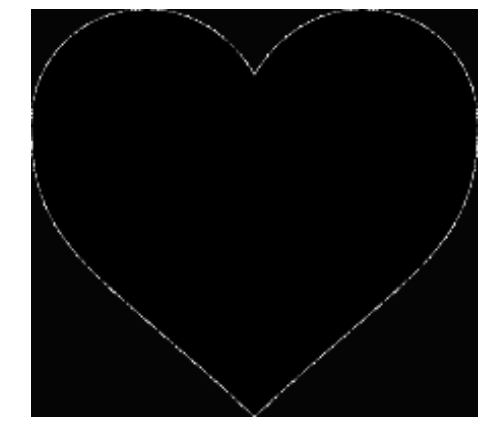

In [83]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray,  # 흑백으로 설정 
           interpolation='bilinear')      # 보간법
plt.axis('off')   # x,y 축을 제거 
plt.show()

In [84]:
wc = WordCloud(background_color='white',   # 배경색 설정
               max_words=2000,             # 최대 단어 설정
               mask=alice_mask,            # 사진 
              stopwords = stopwords)       # 필터 단어 
wc = wc.generate(text)
# wc.words_                                  # 빈도수로 나타남

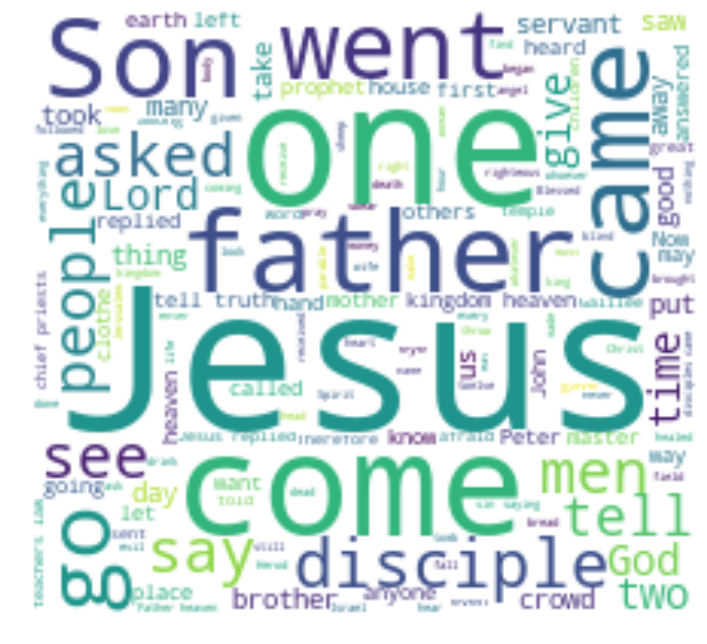

In [85]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### 문장의 이해와 유사도 측정

In [92]:
from nltk.tokenize import word_tokenize
import nltk

In [93]:
train = [('i like you', 'pos'), 
         ('i hate you', 'neg'), 
         ('you like me', 'neg'),
         ('i like her', 'pos')]

In [101]:
# nltk.download('punkt')                       # 요걸 해주자!!, word_tokenize 오류시 실행할 것.


# for sentence in train:
#     print(sentence[0])
#     for words in word_tokenize(sentence[0]):
#         print(words)                           # 단어들을 쭉 뽑아올 수 있다.


all_words = set(word.lower() for sentence in train for word in word_tokenize(sentence[0]))
all_words  # 단어를 분리
# {'hate', 'her', 'i', 'like', 'me', 'you'}  : 말뭉치

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [110]:
t = [({word: (word in word_tokenize(x[0]))        # x[0] : 문장
       for word in all_words}, x[1])              # x[1] : pos / neg
         for x in train]
t

#  'i like you'
#  [({'me': False,
#    'you': True,
#    'like': True,
#    'her': False,
#    'hate': False,
#    'i': True},
#   'pos')

[({'me': False,
   'you': True,
   'like': True,
   'her': False,
   'hate': False,
   'i': True},
  'pos'),
 ({'me': False,
   'you': True,
   'like': False,
   'her': False,
   'hate': True,
   'i': True},
  'neg'),
 ({'me': True,
   'you': True,
   'like': True,
   'her': False,
   'hate': False,
   'i': False},
  'neg'),
 ({'me': False,
   'you': False,
   'like': True,
   'her': True,
   'hate': False,
   'i': True},
  'pos')]

In [113]:
# 나이브 베이즈 분류 : 문장을 학습

classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                    hate = False             pos : neg    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0


In [121]:
# test 데이터 사용 : 분류
# test_sentence = 'i like Jane'      # 'pos'
test_sentence = 'i hate Jane'        # 'neg'
test_sent_features = {word.lower():                                    # lower : 소문자
                      (word in word_tokenize(test_sentence.lower()))   # tokenize : 문장을 단어로 뽑아냄
                      for word in all_words}
test_sent_features

{'me': False,
 'you': False,
 'like': False,
 'her': False,
 'hate': True,
 'i': True}

In [122]:
classifier.classify(test_sent_features)

'neg'

## 8-6. Naive Bayes Classifier의 이해 - 한글

 - 문장의이해 : 한글

In [124]:
from konlpy.tag import Twitter
pos_tagger = Twitter()
train = [('메리가 좋아', 'pos'), 
         ('고양이도 좋아', 'pos'),
         ('난 수업이 지루해', 'neg'),
         ('메리는 이쁜 고양이야', 'pos'),
         ('난 마치고 메리랑 놀거야', 'pos')]

C:\Users\CPB06GameN\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [131]:
all_words = set(word.lower() for sentence in train
                        for word in word_tokenize(sentence[0]))
all_words   # 단어를 분리 

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [132]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                        for x in train]
t

[({'마치고': False,
   '지루해': False,
   '놀거야': False,
   '좋아': True,
   '고양이야': False,
   '메리랑': False,
   '수업이': False,
   '난': False,
   '고양이도': False,
   '메리는': False,
   '메리가': True,
   '이쁜': False},
  'pos'),
 ({'마치고': False,
   '지루해': False,
   '놀거야': False,
   '좋아': True,
   '고양이야': False,
   '메리랑': False,
   '수업이': False,
   '난': False,
   '고양이도': True,
   '메리는': False,
   '메리가': False,
   '이쁜': False},
  'pos'),
 ({'마치고': False,
   '지루해': True,
   '놀거야': False,
   '좋아': False,
   '고양이야': False,
   '메리랑': False,
   '수업이': True,
   '난': True,
   '고양이도': False,
   '메리는': False,
   '메리가': False,
   '이쁜': False},
  'neg'),
 ({'마치고': False,
   '지루해': False,
   '놀거야': False,
   '좋아': False,
   '고양이야': True,
   '메리랑': False,
   '수업이': False,
   '난': False,
   '고양이도': False,
   '메리는': True,
   '메리가': False,
   '이쁜': True},
  'pos'),
 ({'마치고': True,
   '지루해': False,
   '놀거야': True,
   '좋아': False,
   '고양이야': False,
   '메리랑': True,
   '수업이': False,
   '난': True,
   '고양이도': False,
   '메리는': 

In [133]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0


In [134]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

In [135]:
test_sent_features = {word.lower(): 
                                          (word in word_tokenize(test_sentence.lower()))
                                           for word in all_words}
test_sent_features

{'마치고': False,
 '지루해': False,
 '놀거야': True,
 '좋아': False,
 '고양이야': False,
 '메리랑': True,
 '수업이': True,
 '난': True,
 '고양이도': False,
 '메리는': False,
 '메리가': False,
 '이쁜': False}

In [136]:
classifier.classify(test_sent_features)

'neg'

#### 조사 방식이 아닌 영어 방식으로 그대로 했기 때문에 다른 답이 나왔다.

In [137]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [138]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [139]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [140]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

In [141]:
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': True,
   '고양이/Noun': True,
   '도/Josa': True,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': False,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': True,
   '수업/Noun': True,
   '이/Josa': True,
   '지루하다/Adjective': True,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Jo

In [142]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

In [143]:
test_sentence = [("난 수업이 마치면 메리랑 놀거야")]

In [144]:
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [145]:
classifier.show_most_informative_features()

Most Informative Features
                  난/Noun = True              neg : pos    =      2.5 : 1.0
                 메리/Noun = False             neg : pos    =      2.5 : 1.0
                고양이/Noun = False             neg : pos    =      1.5 : 1.0
            좋다/Adjective = False             neg : pos    =      1.5 : 1.0
                  가/Josa = False             neg : pos    =      1.1 : 1.0
                  야/Josa = False             neg : pos    =      1.1 : 1.0
                  랑/Josa = False             neg : pos    =      1.1 : 1.0
                  고/Josa = False             neg : pos    =      1.1 : 1.0
           이쁘다/Adjective = False             neg : pos    =      1.1 : 1.0
                 놀다/Verb = False             neg : pos    =      1.1 : 1.0


In [146]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

In [147]:
classifier.classify(test_sent_features)

'pos'

### 문장을 파싱해서 분석하고 그 다음 대화를 이어가야 한다.

## 문장의 유사도 측정

In [149]:
from sklearn.feature_extraction.text import CountVectorizer

In [153]:
vectorizer = CountVectorizer(min_df = 1)

In [170]:
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떻하죠?',
                   '메리는 공원에서 산책하고 노는 것을 싫어해요',
                   '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
                   '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']

In [172]:
X = vectorizer.fit_transform(contents)
vectorizer.get_feature_names()

['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '여행을',
 '이상해요',
 '있어요']

In [174]:
X.toarray().transpose()

array([[0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int64)

In [177]:
# x = vectorizer.fit_transform(contents)
# x_t =x.toarray().transpose()
# print(x_t.shape)                     # (22, 4), 4는 문장이 4개라는 뜻이다.(contents)
# print(x_t)
# vectorizer.get_feature_names()       # 22개  이 중에서 들어 있는가 아닌가로 판단
# x.toarray().transpose()

# 문장을 쪼개고 그것이 들어있는가 아닌가를 판단.
# feature 를 뽑고 공통적인 부분을 잡아낸다.

In [178]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_vec = vectorizer.transform(new_post)
print(new_post_vec.toarray())

# [[0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]]
# 단어가 들어가는 곳에 1이 표시된다.
# 위에서 나온 기준으로
# 단어가 없다면 나오지 않는다.
# 기준이 되는 단어가 많을수록 좋다. ==> 유사도가 올라감

[[0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]]


In [182]:
import scipy as sp
def dist_raw(v1,v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())     # linalg : 선형대수 함수

In [193]:
X = vectorizer.fit_transform(contents)
num_samples, num_features = X.shape
# print(num_samples, num_features)          # 4 22


best_doc = None
best_dist = 65535
best_i = None

post_vec = X.getrow(0)
# print(post_vec.toarray())           # [[0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0]]


for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i
# 거리가 가깝다는 것은 차이가 없다는 것이다.

== Post 0 with dist=2.45   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=2.24   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.65   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요
